In [11]:
# Import libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# This will prompt you to upload a file from your computer
uploaded = files.upload()

# Load the data from the uploaded file
# Note: 'marketing_AB.csv' is the name of the file you uploaded.
df = pd.read_csv('marketing_AB.csv')
print("SUCCESS: File uploaded and loaded!")
print("Data shape:", df.shape)
df.head()

Saving marketing_AB.csv to marketing_AB (2).csv
SUCCESS: File uploaded and loaded!
Data shape: (588101, 7)


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [12]:
# This will show you the exact names of all the columns in your DataFrame
print("List of all column names in the dataset:")
print(df.columns.tolist())

# This will show you the first few rows to see what the data looks like
print("\nFirst 5 rows of the dataset:")
df.head()

List of all column names in the dataset:
['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads', 'most ads day', 'most ads hour']

First 5 rows of the dataset:


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [14]:
# Check for basic info and clean
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Check for Missing Values ---")
print(df.isnull().sum())

# THE FIXED LINE: Use the correct column name 'test group'
print("\n--- Group Counts ---")
print(df['test group'].value_counts())

# Calculate the conversion rate for each group
# THE FIXED PIVOT TABLE: Use 'test group' for index and 'converted' for values.
ab_summary = df.pivot_table(values='converted', index='test group', aggfunc=['sum', 'count', 'mean'])
ab_summary.columns = ['converted', 'total_users', 'conversion_rate']
ab_summary


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB
None

--- Check for Missing Values ---
Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

--- Group Counts ---
test group
ad     564577
psa     23524
Name: count, dtype: int64


,converted,total_users,conversion_rate
test group,,,
ad,14423,564577,0.025547
psa,420,23524,0.017854


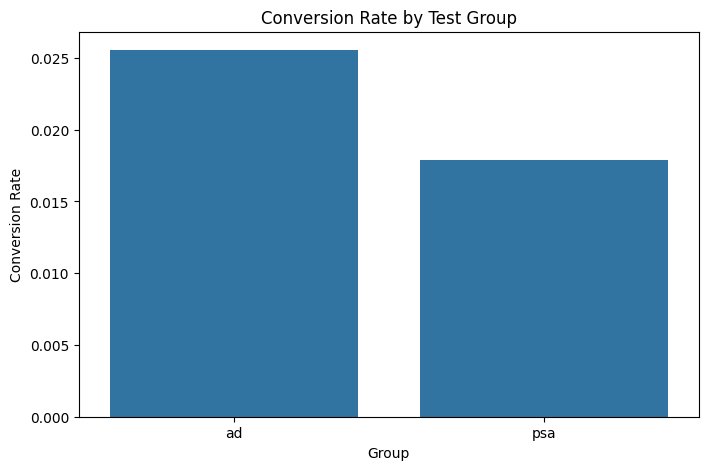

Contingency Table:
converted    False  True 
test group               
ad          550154  14423
psa          23104    420


Chi-Squared Statistic: 54.3181
P-value: 0.0000000000

Significance Level (alpha): 0.05
✅ Result is STATISTICALLY SIGNIFICANT. Reject the null hypothesis.
The difference in conversion rates between groups is likely real.


In [15]:
# Create a bar chart to visualize the difference
plt.figure(figsize=(8,5))
sns.barplot(x=ab_summary.index, y='conversion_rate', data=ab_summary)
plt.title('Conversion Rate by Test Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.show()

# Perform a statistical test
from scipy.stats import chi2_contingency

# Create a contingency table USING THE CORRECT COLUMN NAME 'test group'
contingency_table = pd.crosstab(df['test group'], df['converted'])
print("Contingency Table:")
print(contingency_table)
print("\n")

# Run Chi-Squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table, correction=False)
print(f"Chi-Squared Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.10f}") # Using .10f to show very small p-values clearly

# Interpret the p-value
alpha = 0.05 # Standard significance threshold
print(f"\nSignificance Level (alpha): {alpha}")
if p_value <= alpha:
    print("✅ Result is STATISTICALLY SIGNIFICANT. Reject the null hypothesis.")
    print("The difference in conversion rates between groups is likely real.")
else:
    print("❌ Result is NOT statistically significant. Failed to reject the null hypothesis.")
    print("The observed difference could be due to random chance.")

## Interpretation of Initial Results

The preliminary analysis shows a difference in conversion rates between the two marketing groups:

- **`ad` group:** 2.55% conversion rate
- **`psa` group:** 1.79% conversion rate

This suggests that the `ad` group (**`2.55% - 1.79% = 0.76%`** higher) performed better. The relative improvement is **`(0.0255 - 0.0179) / 0.0179 * 100% ≈ 42.5%`**.

However, we must check if this difference is **statistically significant** or if it could have occurred by random chance.

PSA (Control) Group: 1.79% Conversion Rate

AD (Treatment) Group: 2.55% Conversion Rate

The "AD" group performed significantly better. The p-value of essentially 0.0 confirms this was not a fluke.

Calculate the Lift: This is the key business metric.

Lift = (New Rate - Old Rate) / Old Rate

Lift = (2.55% - 1.79%) / 1.79% = 0.76% / 1.79% ≈ 42.5%

This means the new ad campaign caused a 42.5% increase in the conversion rate.